In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  kavya2099


Your Kaggle Key:

  ································


100%|██████████| 178M/178M [00:06<00:00, 30.8MB/s] 


# Online payment fraud detection

We are living in the digital world where people started approaching towards current technologies. They make our work easy and its reliable. 

Online payment is one of the scenarios where people started using in recent years. Just one click! one Tap! makes our work easier and faster. 
As much as we know about the merits of online payment, there are fraudsters who try to loot money from people with different techniques.

With the increase of online payment now-a-days, the online payment fraud has also been rising and it's actually a major concern among the people who are not aware of the current technologies.

Let's analyze about the online payment fraud detection dataset taken from Kaggle and provide insights on this!!

Getting the data from csv

In [3]:
df= pd.read_csv('./online-payment-fraud-detection/onlinefraud.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

# Columns in dataset

**step:** represents a unit of time where 1 step equals 1 hour

**type:** type of online transaction

**amount:** the amount of the transaction

**nameOrig:** customer starting the transaction


**oldbalanceOrg:** balance before the transaction

**newbalanceOrig:** balance after the transaction

**nameDest:** recipient of the transaction

**oldbalanceDest:** initial balance of recipient before the transaction

**newbalanceDest:** the new balance of recipient after the transaction

**isFraud:** fraud transaction

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Checking for missing values

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Its a good thing that there is no missing values!



Checking values for few columns

In [9]:
df.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [10]:
df.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [11]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [12]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [13]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# Exploratory Analysis and Visualization

# Univariate Analysis

Univariate analysis is used to analyze the data of single variable. Here we will analyze using histplot

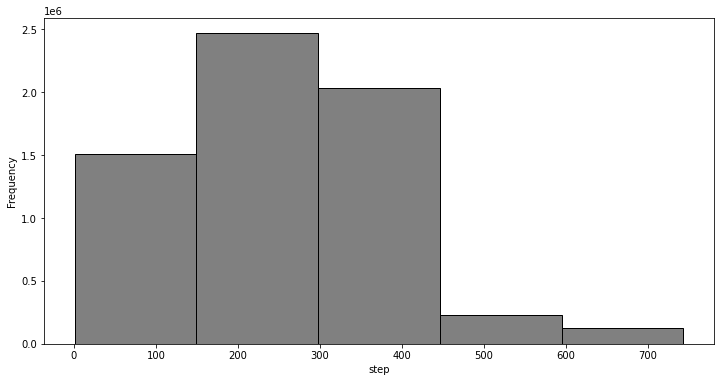

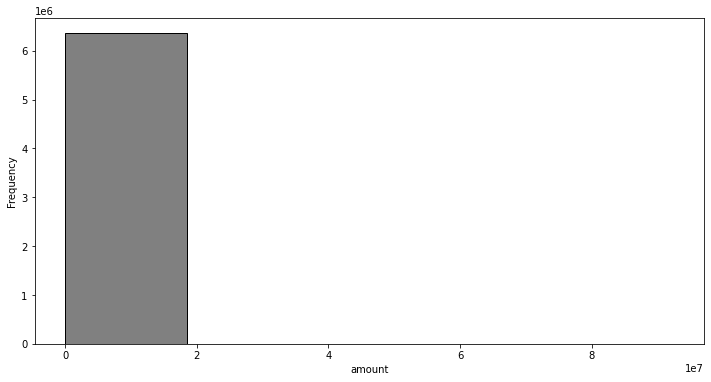

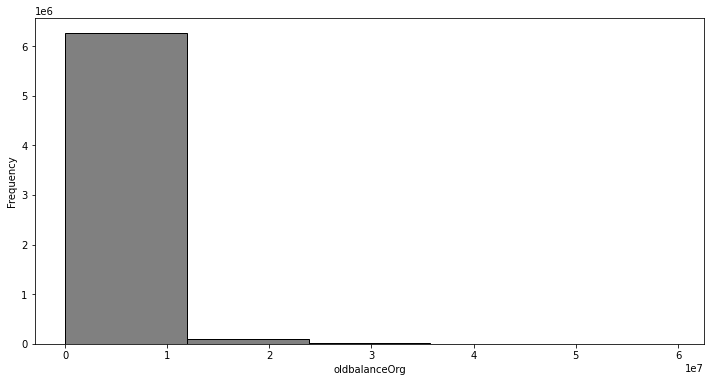

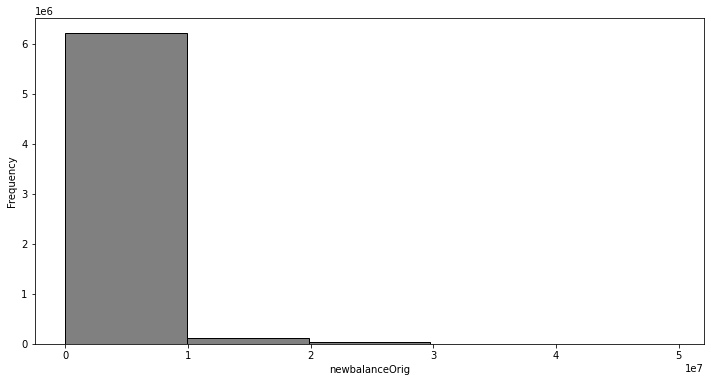

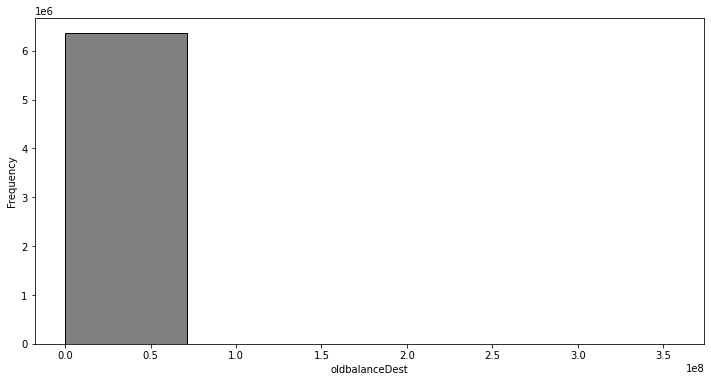

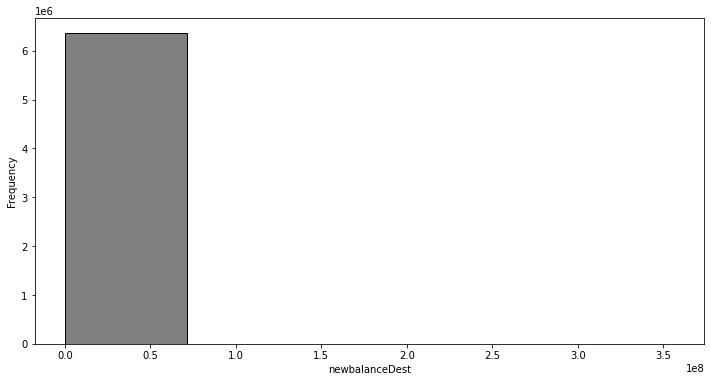

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

We could see some outliers in the plots. So let's work on it!

We'll use Quantile-based Flooring and Capping for these columns!

**Capping** is replacing all higher side values exceeding a certain theoretical maximum or upper control limit (UCL) by the UCL value. Here we'll do 90th percentile for higher values.

**Flooring** is replacing all values falling below a certain theoretical minimum or lower control limit (UCL) by the LCL value. Here we'll do 90th percentile for higher values.



In [15]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))

    print('\n')


amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




Now we'll remove the outlier

In [16]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




Now we'll take a look at it after removing outliers

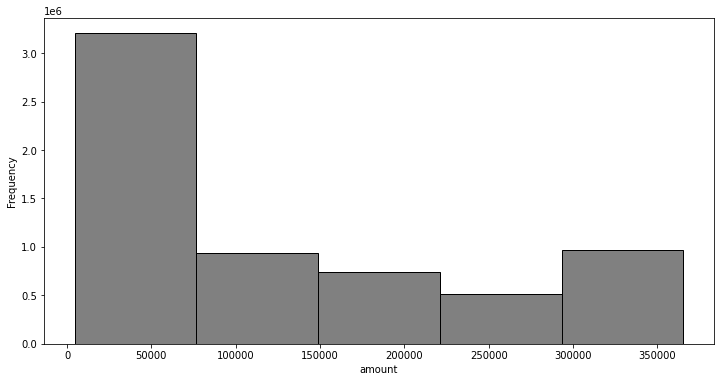

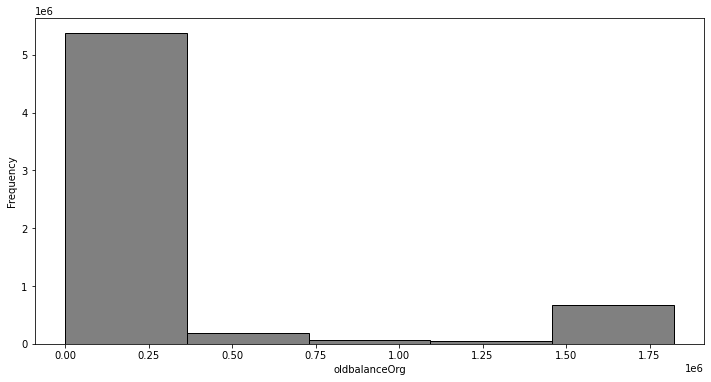

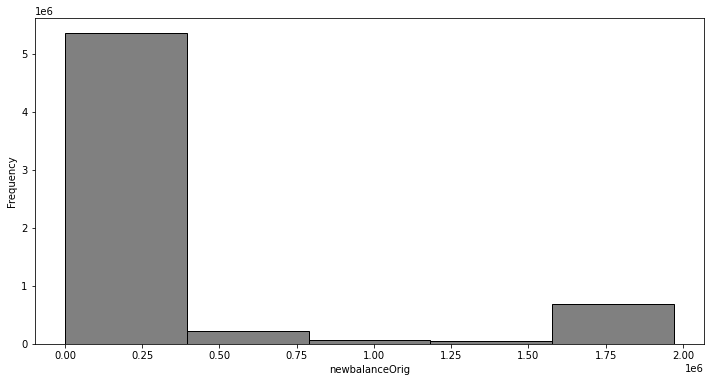

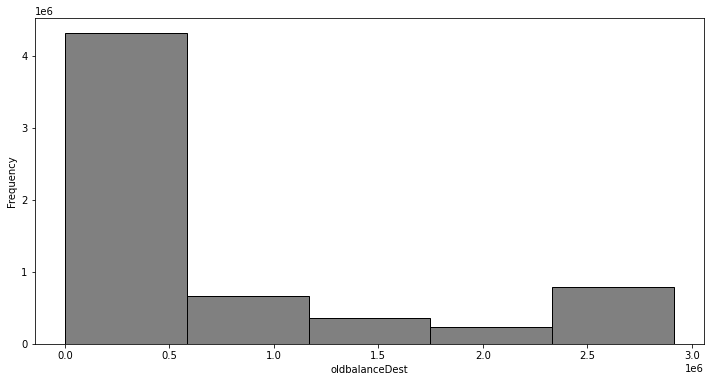

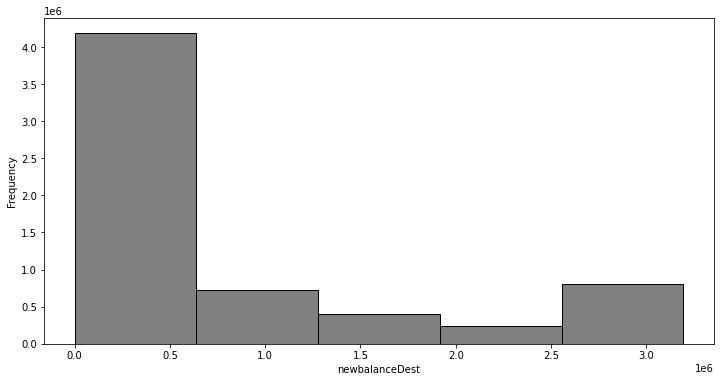

In [17]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

* We have a maximum set of distribution between 150 to 400 of step

**After outlier treatment**

* Amount ranges between 0-35 lakhs with more values ranging between 0-75,000. We'll analyze further in the upcoming sections.
* OldbalanceOrg ranges around 0-18 lakh with more frequency around 0-375,000
* NewbalanceOrig ranges around 0-19 lakh with more frequency around 0-375,000
* OldbalanceDest ranges around 0-29 lakh with common values around 0-625,000
* NewbalanceDest ranges around 0-35 lakh with common values around 0-625,000



Columns we'll analyze further:

* type
* amount
* nameDest
* isFraud
* isFlaggedFraud
* step


# Type

We'll look into the type of transactions done

In [18]:
df.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [19]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [20]:
payment = df.type.value_counts()
payment

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

As we have already seen there are 5 types of payment happened. We'll plot it using horizontal bar

<AxesSubplot:>

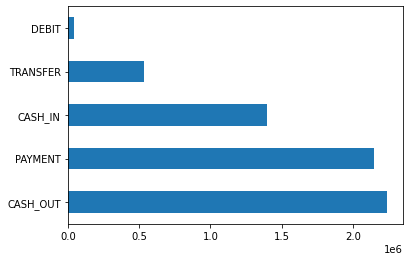

In [21]:
payment.plot(kind='barh')

<AxesSubplot:xlabel='type', ylabel='count'>

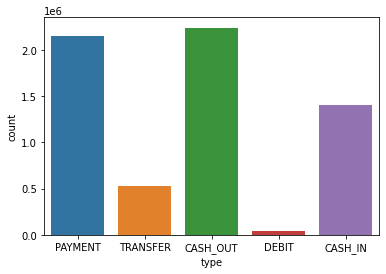

In [22]:

sns.countplot(x='type', data=df)

More money has been transacted mostly through cash out followed by payment type.


Now let's look at the relationship with type column with isfraud column

In [23]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult
 

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [24]:
#with fraud happened type
CrosstabResult[1]

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: 1, dtype: int64

We can see that fraud occurred mostly while during **transfer** or **cashout**. But the numbers indicating fraud happened with fraud not happened is very low. So it'll not be seen in the plot.

<AxesSubplot:xlabel='type'>

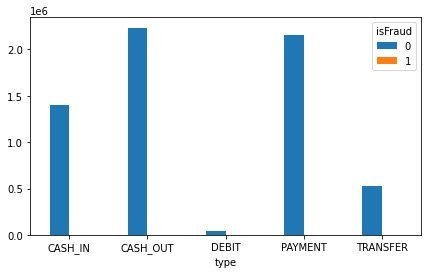

In [25]:
# Grouped bar chart between TYPE and ISFRAUD 
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot:xlabel='type'>

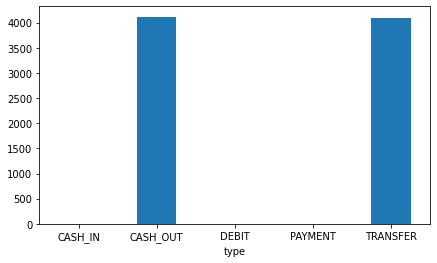

In [26]:
# Grouped bar chart between TYPE and ISFRAUD with maximizing
CrosstabResult[1].plot.bar(figsize=(7,4), rot=0)

(3500.0, 7000.0)

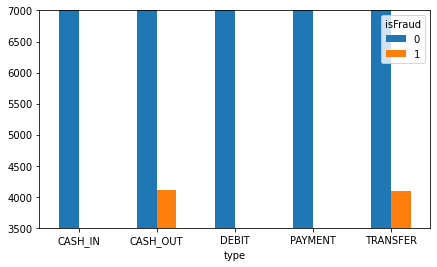

In [27]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

Percentage of fraud happened in the cashout type and transfer type mode

In [28]:
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [29]:
cashout=2233384+4116
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

**0.184 % denotes the percentage of fraud happened in total cashout mode type, which is very less%**

In [30]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

**0.769 % denotes the percentage of fraud happened in total tranfer mode type, which is very also less%**

# Amount 

In [31]:
df.amount

0            9839.640
1            4501.300
2            4501.300
3            4501.300
4           11668.140
              ...    
6362615    339682.130
6362616    365423.309
6362617    365423.309
6362618    365423.309
6362619    365423.309
Name: amount, Length: 6362620, dtype: float64

We'll check the minimum and maximum range amount 

<AxesSubplot:ylabel='amount'>

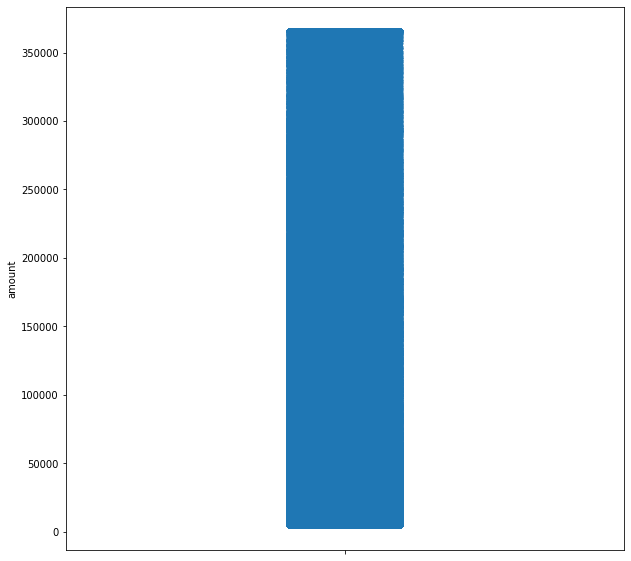

In [32]:
plt.figure(figsize=(10,10))
sns.stripplot(y=df.amount)


In [33]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  4501.3
Maximum:  365423.30900000007


**Lowest amount transaction starts from 4500 and highest amount transaction goes upto 3.6 lakh** 

We'll check the relationship of amount column with isFraud column

<AxesSubplot:title={'center':'amount'}, xlabel='isFraud'>

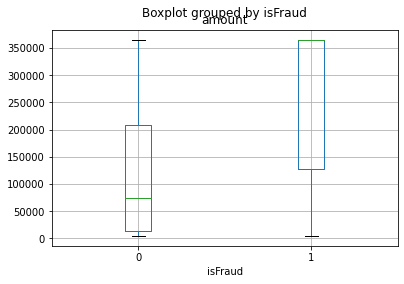

In [34]:
df.boxplot(column='amount', by='isFraud')

**Fraud amount transaction range is between 1.3-3.6 lakh**

# isFlaggedFraud

isFlaggedFraud denotes the transactions that are assumed to be fraud. 

In [35]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

From the total of 63 lakh records only 16 were assumed and flagged as fraud, which is actually a very low number. The actual fraud happend has a very higher value when compared to isFlaggedFraud column. 

Now let's look at how many values they assumed and flagged as fraud is actually correct 

In [36]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,365423.309,C728984460,1822508.289,1970344.793,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,365423.309,C1100582606,1343002.080,1343002.080,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,365423.309,C1035541766,536624.410,536624.410,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,365423.309,C908544136,1822508.289,1970344.793,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,365423.309,C689608084,1822508.289,1970344.793,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,365423.309,C452586515,1822508.289,1970344.793,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,365423.309,C193696150,1822508.289,1970344.793,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.220,C1684585475,353874.220,353874.220,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,365423.309,C786455622,1822508.289,1970344.793,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,365423.309,C19004745,1822508.289,1970344.793,C1806199534,0.0,0.0,1,1


In [37]:
flagged_fraud_records.shape

(16, 11)

This denotes that all the records which were flagged as fraud were correct. 

Now let's look at the percentage of records which were flagged as fraud to the total fraud that happened

In [38]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

8213

In [39]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

16

In [40]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  0.195
Percentage of incorrectly flagged fraud:  99.805


As we can see the percentage of records which are flagged as fraud is 0.195% which is very very less. 

# isFraud

In [41]:
total_transactions = df.shape[0]

fraud_transaction = df[df.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent



0.12908204481801522

In [42]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


In [43]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5188057,367,CASH_OUT,365423.309,C1210833971,435867.160,0.000,C363013236,186826.40,622693.550,1,0
5990227,416,CASH_OUT,365423.309,C2110305720,1822508.289,0.000,C225008798,523626.59,3194869.671,1,0
5990225,416,CASH_OUT,365423.309,C246726057,1822508.289,0.000,C1786144514,2423749.18,3194869.671,1,0
5990224,416,TRANSFER,365423.309,C298387535,1822508.289,1970344.793,C662194461,0.00,0.000,1,0
5988262,415,CASH_OUT,365423.309,C2137951962,1675153.280,0.000,C309573869,12832.26,1687985.530,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6002113,428,CASH_OUT,4501.300,C1838531308,3037.670,0.000,C505532836,800854.71,803892.380,1,0
6002112,428,TRANSFER,4501.300,C1408814433,3037.670,0.000,C944070846,0.00,0.000,1,0
1796322,162,TRANSFER,4501.300,C1172437299,151.000,0.000,C315826176,0.00,0.000,1,0
1796323,162,CASH_OUT,4501.300,C790340353,151.000,0.000,C517676411,386163.34,386314.340,1,0


<AxesSubplot:ylabel='Frequency'>

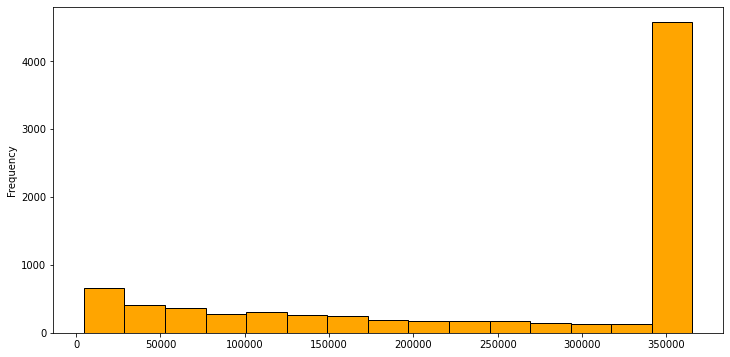

In [44]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

We've found that fraud amount transaction ranges between 1.3-3.6 lakh

Now, we can see that among them most occured were around **340,000-360,000** (3.4-3.6 lakh)

# nameDest

In [45]:
fraudster= df.nameDest.value_counts()
fraudster

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

Since we have large number of unique values, we'll take only top 10 fraudster id name.

Taking the top 10 fraudster ids

In [46]:
fraudster[:10]

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

<AxesSubplot:>

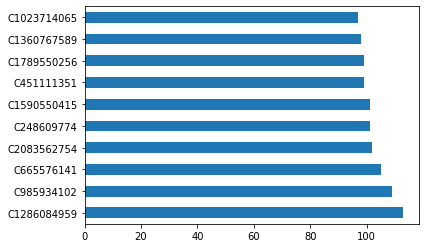

In [47]:
fraudster[:10].plot(kind='barh')

# Step

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

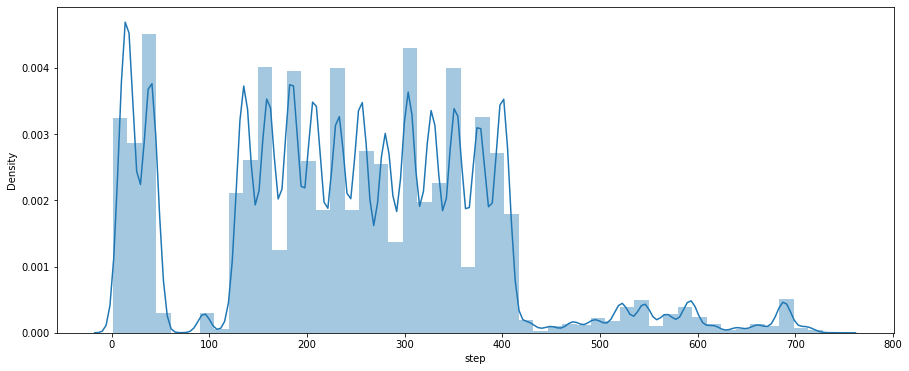

In [48]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

There is a maximum distribution of 150 to 400 of step

# Correlation between features

<AxesSubplot:>

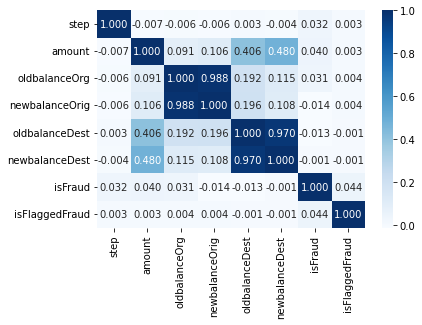

In [49]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

There is a high correlation between newbalanceOrig and oldbalanceOrg.

Also, between newbalanceDest and oldbalanceDest.

Apart from that, we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest

# Analysis insights

### 1. What is the fraud percent that has happened in the overall transaction ?

 Totally there is **8213** fraud transactions happened which constitutes around **0.13%** of total transactions happened

### 2. Under which type of transfer payment type fraud has occurred mostly.

Fraud has happened only in cashout and transfer type. **0.183 %**  fraud happened in total cashout mode type and **0.769 %**  fraud happened in total transfer mode type

### 3. Were we able to mark the fraud transaction as isFlaggedFraud?
No. Only **16** records of the 63 lakh records were flagged as fraud which is very less that constitutes to **0.195 %** of the total fraud transactions.

### 4. What is the percentage of incorrect flagged fraud records?

We have around **8197** records which are incorrectly flagged  as 0 which constitutes **99.805 %** of total fraud records

### 5. Were all the isFlaggedFraud records that are marked as fraud is correct?
**Yes**. All the 16 transactions that are flagged as fraud is actually fraud transactions

### 6. At what amount range, fraud has happened?  
The fraud amount transaction ranges between 1.3-3.6 lakh with most occurred in the range  **340,000-360,000 (3.4-3.6 lakh)**.

# Conclusion

* We have large number of records which are incorrectly flagged as 0.
* Incorrect flagging might have big impact in future if we don't calculate it properly as it might lead to increase in online payment fraud percentage as people relay more on online payment nowadays.
* The amount range usually fraudsters target is aroung **1-4** lakhs which is certainly a large sum.
* Fraudsters focus during cashout and transfer mode type transfer.
* Fraud is less likely/rare to happen during payment mode transfer though people are using online payment more.
* There is not much information taken from **oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest and newbalanceDest** columns though they had good positive correlation score

# References

* [https://www.pluralsight.com/guides/cleaning-up-data-from-outliers](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)
* [analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/](http://analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)
* [https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/](https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/)
* [https://jovian.ai/aakashns-6l3/us-accidents-analysis](http://jovian.ai/aakashns-6l3/us-accidents-analysis)
* https://thinkingneuron.com/how-to-visualize-the-relationship-between-two-categorical-variables-in-python/

